# NFL Play by Play (2009-2017) Exercise

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

nfl = pd.read_csv('../data/external/NFL Play by Play 2009-2017 (v4).csv', low_memory=False)

## Basic info on the `NFL Play by Play` dataframe

In [44]:
pd.options.display.max_columns = 150
nfl.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [8]:
print("Shape:", nfl.shape)
total = np.product(nfl.shape)
print("Number of overall data:", total)

Shape: (407688, 102)
Number of overall data: 41584176


In [56]:
nfl.describe

<bound method NDFrame.describe of               Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0       2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1       2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2       2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3       2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4       2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   
...            ...         ...    ...  ...   ...    ...        ...       ...   
407683  2017-12-31  2017123101     29    4   NaN  00:28          1      28.0   
407684  2017-12-31  2017123101     29    4   3.0  00:28          1      28.0   
407685  2017-12-31  2017123101     29    4   4.0  00:24          1      24.0   
407686  2017-12-31  2017123101     30    4   1.0  00:14          1      14.0   
407687  2017-12-31  2017123101     30    4   NaN  00:00          0       0.0   

     

---
## Non-missing values
#### Number of non-missing data

In [10]:
non_missing_total = nfl.notnull().sum().sum()
print("Number of overall non-missing data:", non_missing_total)

Number of overall non-missing data: 31241301


In [11]:
non_missing_count = nfl.count()
non_missing_count

Date        407688
GameID      407688
Drive       407688
qtr         407688
down        346534
             ...  
Win_Prob    382679
WPA         402147
airWPA      159187
yacWPA      158926
Season      407688
Length: 102, dtype: int64

#### Information on non-missing values

In [12]:
non_missing_info = nfl.info()
non_missing_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


---
## Missing values
#### Check if there are any missing values in the data

In [13]:
missing = nfl.isnull()
missing.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,...,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,True,False,False,True,True,True,False,False,True,...,False,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,True,...,False,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,...,False,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,True,...,True,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,True,False,False,True,True,True,False,False,True,...,True,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

#### Overall missing data

In [52]:
missing_total = np.count_nonzero(missing)
print("Number of overall missing data:", missing_total)

Number of overall missing data: 10342875


#### Number of missing values in each field

In [17]:
missing_count = missing.sum()
missing_count

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64

#### Ratio of missing values

In [19]:
missing_count / len(nfl)

Date        0.000000
GameID      0.000000
Drive       0.000000
qtr         0.000000
down        0.150002
              ...   
Win_Prob    0.061343
WPA         0.013591
airWPA      0.609537
yacWPA      0.610177
Season      0.000000
Length: 102, dtype: float64

#### Percent of total values missing

In [21]:
missing_percentage_total = (missing_total / total) * 100
print('Percent of total values missing: {:.2f}%'.format(missing_percentage_total))

Percent of total values missing: 24.87%


#### Percent of values missing in each field

In [26]:
missing_percentage = nfl.isnull().mean().round(4) * 100
missing_percentage.sort_values()

Date                 0.00
PassAttempt          0.00
AirYards             0.00
YardsAfterCatch      0.00
QBHit                0.00
                    ...  
RecFumbTeam         98.93
ChalReplayResult    99.17
TwoPointConv        99.85
BlockingPlayer      99.97
DefTwoPoint         99.99
Length: 102, dtype: float64

## Q. For the different types of missing values, infer why you think they are missing? Why could they be missing?

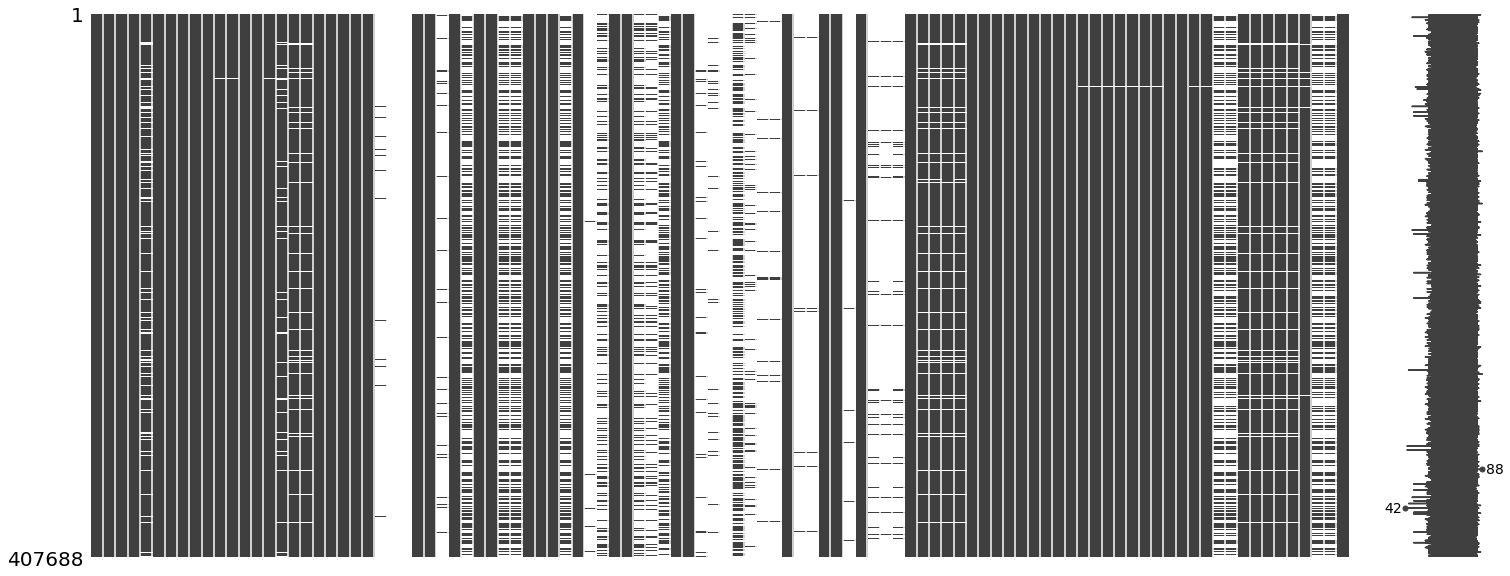

In [50]:
%matplotlib inline
msno.matrix(nfl)
plt.show()

In [55]:
missing_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64


__Information does not exist__

1. 

</br>

__Was not recorded, and important__

1. 

</br>

__Was not recorded, but not important__

1. 

In [43]:
nfl[nfl['down'].isnull()]

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,...,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.000000,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
36,2009-09-10,2009091000,8,1,NaN,00:00,0,2700.0,6.0,PIT,44.0,44.0,0,1,0.0,0.0,NaN,NaN,END QUARTER 1,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Quarter End,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PIT,TEN,0,None,3,3,3,3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2009
68,2009-09-10,2009091000,11,2,NaN,02:00,2,1920.0,8.0,PIT,21.0,21.0,0,12,0.0,NaN,NaN,NaN,Two-Minute Warning,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Two Minute Warning,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PIT,TEN,0,None,3,3,3,3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.021366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
71,2009-09-10,2009091000,11,2,NaN,01:29,2,1889.0,9.0,PIT,37.0,37.0,0,45,0.0,NaN,NaN,NaN,Timeout #1 by PIT at 01:29.,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Timeout,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PIT,TEN,1,PIT,3,3,3,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2009
73,2009-09-10,2009091000,11,2,NaN,01:22,2,1882.0,7.0,TEN,2.0,2.0,0,79,0.0,0.0,PIT,TEN,"J.Reed extra point is GOOD, Center-G.Warren, H...",1,0,1,0,Made,NaN,NaN,0,0,NaN,Extra Point,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,6.0,0.0,6.0,6.0,PIT,TEN,0,None,2,2,3,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990795,0.0,0.990795,0.009205,NaN,NaN,0.738386,0.261614,0.715750,0.284250,0.738386,-0.022636,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407677,2017-12-31,2017123101,28,4,

## Q. What happens if you were to drop all missing values? Is this a good option?

In [33]:
nfl_dropped = nfl.dropna()
nfl_dropped

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,...,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


There will be no rows left in the dataframe if I remove all the missing values. Which is NOT good.

In [37]:
nfl_dropped_column = nfl.dropna(axis=1)
print("Number of columns with missing values dropped: %d" % nfl_dropped_column.shape[1])


Number of columns with missing values dropped: 41


There will be only 41 columns left if column

## Q. Fill in all missing values using at least two methods.

## Q. What statistical impact does filling this data have on averages, standard deviations, and correlations between data?

## Q. Can you find further insights into this data? Is any of it business worthy (could have an impact on profits or ROI)? Is any of it humanity worthy (could improve all of our lives)?